In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns 

In [5]:
from google.colab import files
uploaded = files.upload()


Saving titanic-passengers (1).csv to titanic-passengers (1) (6).csv


In [6]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['titanic-passengers (1).csv']),sep=';')

# Dataset is now stored in a Pandas Dataframe

In [7]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [8]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [9]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df2.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
________________________________________


In [11]:
df2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df2.drop('PassengerId', axis=1, inplace=True)
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [13]:
df2.drop('Cabin', axis=1, inplace=True)

In [14]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [15]:
# Analyse missing data
draw_missing_data_table(df2)


,Total,Percent
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000


In [16]:
# Fill with median
df2['Age'].fillna(29.699118	, inplace=True)

In [17]:
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...
886,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
887,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C
888,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S
889,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S


In [18]:
# Analyse missing data
draw_missing_data_table(df2)

,Total,Percent
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Age,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000


In [19]:
# Data types
df2.dtypes

Survived     object
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [20]:
print(df2['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [21]:
df2['Embarked'].fillna('S'	, inplace=True)

In [22]:
print(df2['Embarked'].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [23]:
### Encoding categorical data survived, embarked, sex

In [24]:
#Encoding the Survived Column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2['Survived']=encoder.fit_transform(df2['Survived'])
print(df2['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [25]:
#Encoding the Embarked Column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2['Embarked']=encoder.fit_transform(df2['Embarked'])
print(df2['Embarked'].value_counts())

2    646
0    168
1     77
Name: Embarked, dtype: int64


In [26]:
#Encoding the Sex Column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2['Sex']=encoder.fit_transform(df2['Sex'])
print(df2['Sex'].value_counts())

1    577
0    314
Name: Sex, dtype: int64


In [27]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

In [28]:
#Starting visualization

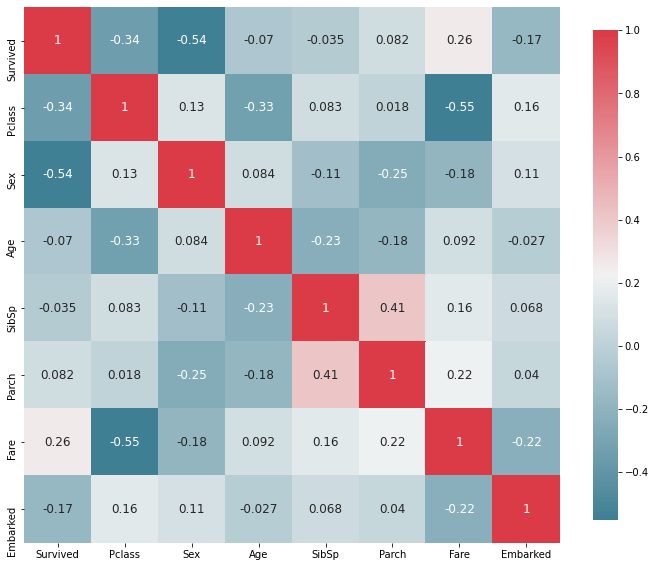

In [29]:
plot_correlation_map(df2)

**We can see that there is a correlation between Pclass and Fare which is logical but more importantly there is a correlation between Survived and Sex, there is also a slight negative correlation between parch and sibsp.**

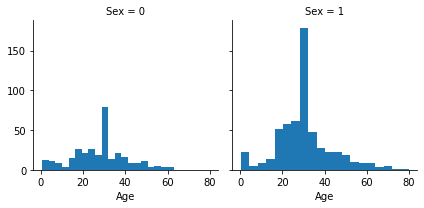

In [30]:
g = sns.FacetGrid(df2,col='Sex')
g.map(plt.hist,'Age',bins=20)

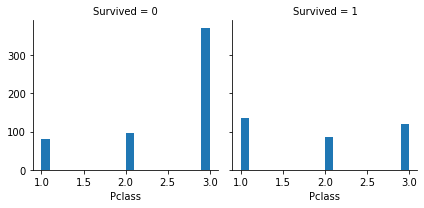

In [31]:
g = sns.FacetGrid(df2,col='Survived')
g.map(plt.hist,'Pclass',bins=20)

In [32]:
# We can see that that people in Pclass 3 have the most severe survival rate amongst classes.

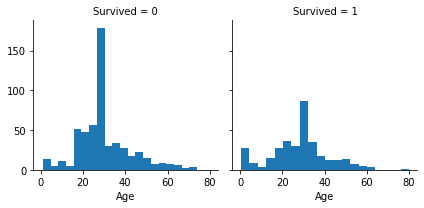

In [33]:
g = sns.FacetGrid(df2,col='Survived')
g.map(plt.hist,'Age',bins=20)

In [34]:
# We can see that the most impacted age group is the 30s, it has the the most casualties and most survivals due to most of the passengers being in that the age group. 
# That is seen in the median (29.7).

In [36]:
df2['Title'] =df2.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [37]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Miss",

                    "Mr" :        "Mr",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
df2.replace(Title_Dictionary,inplace=True)
df2.head()
df2['Title'].value_counts()

Mr         517
Miss       186
Mrs        125
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [38]:
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,2,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,2,Mr
2,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,2,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,2,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,2,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0,Mrs
887,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,0,Mr
888,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,2,Miss
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,2,Mr


In [39]:
df2 = df2.drop(columns='Name')

In [40]:
df2.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Title       0
dtype: int64

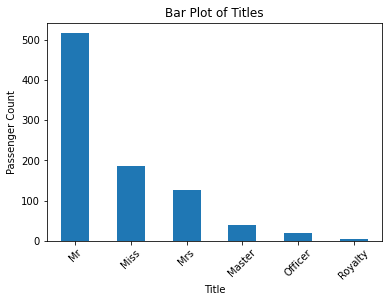

In [41]:
plt.xlabel('Title')
plt.ylabel('Passenger Count')
plt.title('Bar Plot of Titles')
c = df2['Title'].value_counts()
c.plot.bar(rot=45)

In [42]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,2,1,28.000000,0,0,248740,13.0000,2,Mr
1,0,3,1,25.000000,0,0,348123,7.6500,2,Mr
2,0,3,1,20.000000,0,0,350050,7.8542,2,Mr
3,0,3,0,29.000000,0,4,349909,21.0750,2,Mrs
4,0,1,1,31.000000,1,0,F.C. 12750,52.0000,2,Mr
...,...,...,...,...,...,...,...,...,...,...
886,1,2,0,14.000000,1,0,237736,30.0708,0,Mrs
887,0,3,1,22.000000,0,0,2669,7.2292,0,Mr
888,0,3,0,30.000000,0,0,315084,8.6625,2,Miss
889,0,3,1,29.699118,0,0,349215,7.8958,2,Mr


In [43]:
print(df2['Sex'].value_counts())

1    577
0    314
Name: Sex, dtype: int64


In [44]:
df2['Family Size']=df2['SibSp'] + df2['Parch'] + 1

In [45]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
0,0,2,1,28.000000,0,0,248740,13.0000,2,Mr,1
1,0,3,1,25.000000,0,0,348123,7.6500,2,Mr,1
2,0,3,1,20.000000,0,0,350050,7.8542,2,Mr,1
3,0,3,0,29.000000,0,4,349909,21.0750,2,Mrs,5
4,0,1,1,31.000000,1,0,F.C. 12750,52.0000,2,Mr,2
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,0,14.000000,1,0,237736,30.0708,0,Mrs,2
887,0,3,1,22.000000,0,0,2669,7.2292,0,Mr,1
888,0,3,0,30.000000,0,0,315084,8.6625,2,Miss,1
889,0,3,1,29.699118,0,0,349215,7.8958,2,Mr,1


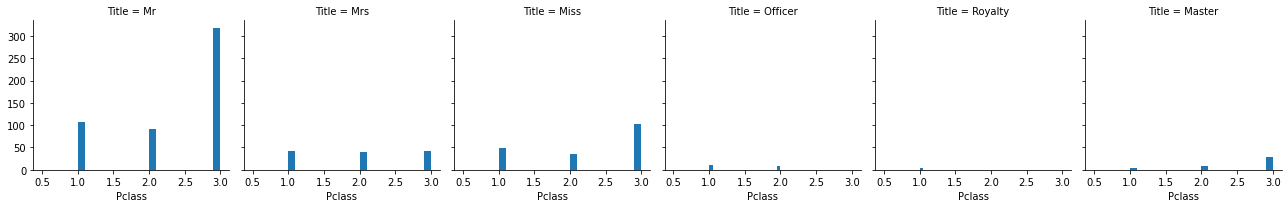

In [47]:
g = sns.FacetGrid(df2,col='Title')
g.map(plt.hist,'Pclass',bins=20)

In [48]:
grouped = df2.groupby(['Pclass','Survived'])
grouped.mean()

Sex        Age  ...  Embarked  Family Size
Pclass Survived                       ...                       
1      0         0.962500  40.896074  ...  1.337500     1.587500
       1         0.330882  34.784615  ...  1.125000     1.882353
2      0         0.938144  33.266947  ...  1.824742     1.463918
       1         0.195402  26.076166  ...  1.770115     2.137931
3      0         0.806452  27.417500  ...  1.658602     2.056452
       1         0.394958  23.232689  ...  1.352941     1.857143

[6 rows x 7 columns]